In [235]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import statsmodels.api as sm
from scipy import stats

## Obtención y limpieza de los datos

### Importación de los datos

In [2]:
# Importamos los datos a un DataFrame
file = './data/bertavivesm.20221129144401885.data.csv'
df = pd.read_csv(file, delimiter=';', low_memory=False)

### Limpieza de los datos

In [85]:
df.describe()

,R1_WNAC/WdSpd.Mean,R1_WNAC/WdSpd.Min,R1_WNAC/WdSpd.Max,R1_WNAC/WdSpd.NVal,R1_WNAC/WdSpd.Flag,R1_WNAC/WdSpd.Detailed_Flag,R1_WNAC/WdSpd.A4,R1_WNAC/WdSpd.A3,R1_WNAC/WdSpd.A2,R1_WNAC/WdSpd.A1,...,R1_WTRF/TrfGriPf.Min,R1_WTRF/TrfGriPf.Max,R1_WTRF/TrfGriPf.NVal,R1_WTRF/TrfGriPf.Flag,R1_WTRF/TrfGriPf.Detailed_Flag,R1_WTRF/TrfGriPf.A4,R1_WTRF/TrfGriPf.A3,R1_WTRF/TrfGriPf.A2,R1_WTRF/TrfGriPf.A1,R1_WTRF/TrfGriPf.A0
count,5.230758e+06,5.230758e+06,5.230758e+06,5230758.0,5230758.0,5230758.0,5230758.0,5230758.0,5230758.0,5230758.0,...,5.230758e+06,5.230758e+06,5230758.0,5230758.0,5230758.0,5230758.0,5230758.0,5230758.0,5230758.0,5230758.0
mean,6.635825e+04,6.618180e+04,6.619574e+04,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,5.075787e+04,5.075789e+04,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,2.488902e+05,2.485841e+05,2.486054e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.195044e+05,2.195044e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,8.000000e-01,8.000000e-01,8.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.000000e+00,-1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,5.750000e+00,5.100000e+00,6.300000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.000000e+00,-9.995000e-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,9.000000e+00,8.100000e+00,9.900000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-9.986000e-01,-9.931000e-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,1.300000e+01,1.200000e+01,1.400000e+01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-5.946000e-01,-3.616000e-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,9.999993e+05,9.999993e+05,9.999993e+05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,9.999993e+05,9.999993e+05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [236]:
# Eliminamos las columnas que no nos aportan información
data = df[['#time',' R1_WNAC/WdSpd.Mean',' R1_WNAC/WdDir.Mean',' R1_WTRF/TrfGriVAr.Mean',' R1_WTRF/TrfGriW.Mean',' R1_WTRF/TrfGriPf.Mean']]

In [237]:
# Cambiamos el nombre de las columnas para hacer el DF más entendible
data.columns = ['time','WindSpeed','WindDirection','ReactivePower','ActivePower','PhaseAngle']

In [238]:
# Ponemos el tiempo como indice
data.set_index('time', inplace=True)

In [239]:
data

,WindSpeed,WindDirection,ReactivePower,ActivePower,PhaseAngle
time,,,,,
2012-11-20 00:00:00,14.90,201.80,-0.666463,5.166350,-0.99460
2012-11-20 00:01:00,14.90,201.80,-0.625202,5.154180,-0.99460
2012-11-20 00:02:00,14.70,204.10,-0.658773,5.136520,-0.99450
2012-11-20 00:03:00,14.30,208.50,-0.628620,5.021540,-0.99675
2012-11-20 00:04:00,13.45,209.65,-0.647664,5.094510,-0.99610
...,...,...,...,...,...
2017-11-20 23:55:00,2.95,120.45,0.031556,-0.063793,0.36055
2017-11-20 23:56:00,2.45,112.95,0.031556,-0.092756,0.39160
2017-11-20 23:57:00,1.80,107.30,0.044557,-0.106760,0.60230


### Tratamiento de outliers

In [240]:
data.describe()

,WindSpeed,WindDirection,ReactivePower,ActivePower,PhaseAngle
count,5.230758e+06,5.230758e+06,5.230758e+06,5.230758e+06,5.230758e+06
mean,6.635825e+04,5.605512e+04,1.506902e+04,1.507089e+04,5.083837e+04
std,2.488902e+05,2.296364e+05,1.218271e+05,1.218253e+05,2.196691e+05
min,8.000000e-01,0.000000e+00,-1.734180e+00,-1.682530e-01,-1.000000e+00
25%,5.750000e+00,1.293000e+02,-1.019930e-01,2.820310e-01,-9.999000e-01
50%,9.000000e+00,2.086500e+02,-1.770020e-03,1.980450e+00,-9.959500e-01
75%,1.300000e+01,2.698500e+02,1.322670e-01,5.055020e+00,-4.776500e-01
max,9.999993e+05,9.999993e+05,9.999993e+05,9.999993e+05,9.999993e+05


In [241]:
# Sustituimos todos los valores 999999.333 por NaN
data.replace(999999.333, np.nan, inplace=True)

# Rellenamos los datos que faltan con el dato anterior
data.ffill(axis=0, inplace=True)

/var/folders/2l/vvs13szs5gxbhbsk5mznxk800000gn/T/ipykernel_48354/568166842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(999999.333,np.nan, inplace=True)
/var/folders/2l/vvs13szs5gxbhbsk5mznxk800000gn/T/ipykernel_48354/568166842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.ffill(axis=0, inplace=True)


<AxesSubplot: >

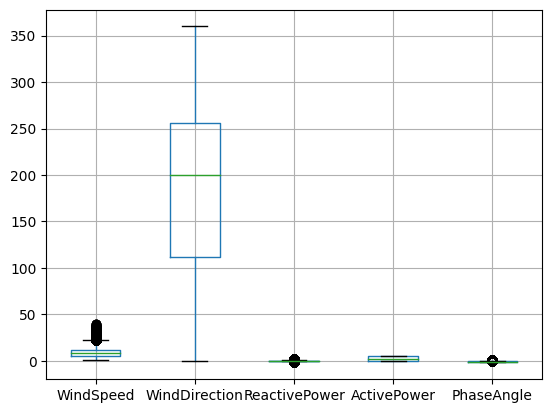

In [206]:
data.boxplot()

## Información basica de los datos

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5230758 entries, 2012-11-20 00:00:00 to 2017-11-20 23:59:00
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   WindSpeed      float64
 1   WindDirection  float64
 2   ReactivePower  float64
 3   ActivePower    float64
 4   PhaseAngle     float64
dtypes: float64(5)
memory usage: 239.4+ MB


In [208]:
data.describe()

,WindSpeed,WindDirection,ReactivePower,ActivePower,PhaseAngle
count,5.230758e+06,5.230758e+06,5.230758e+06,5.230758e+06,5.230758e+06
mean,8.882807e+00,1.880991e+02,8.450503e-02,2.361863e+00,-6.979470e-01
std,4.672094e+00,9.048316e+01,3.707869e-01,2.077195e+00,5.255683e-01
min,8.000000e-01,0.000000e+00,-1.734180e+00,-1.682530e-01,-1.000000e+00
25%,5.300000e+00,1.121000e+02,-1.031530e-01,2.503710e-01,-9.999000e-01
50%,8.300000e+00,1.996000e+02,-3.723260e-03,1.881730e+00,-9.962500e-01
75%,1.200000e+01,2.563000e+02,1.057160e-01,4.998050e+00,-6.515000e-01
max,4.000000e+01,3.599000e+02,1.649280e+00,5.462600e+00,1.000000e+00


<AxesSubplot: >

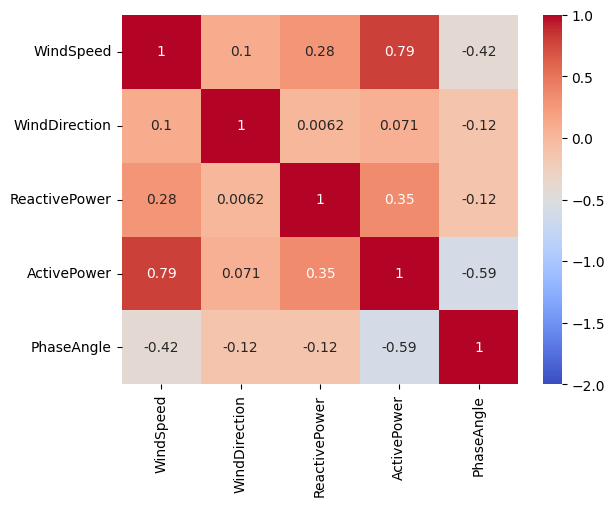

In [209]:
sns.heatmap(data.corr(), vmin = -2, vmax = +1, annot = True, cmap = 'coolwarm')

## Descripción estadística de los datos

Las funciones que se utilizarán para determinar las medidas de tendencia central y variabilidad de cada una de las columnas son las siguientes.

In [210]:
# MEDIDAS DE TENDENCIA CENTRAL
def med_tend_central(valores):
    media = np.mean(valores)
    mediana = np.median(valores)
    print(f'MEDIDAS DE TENCENCIA CENTRAL:\nMedia = {media}\nMediana = {mediana}')

# MEDIDAS DE VARIABILIDAD
def med_var(valores):
    desvest = np.std(valores) 
    percentil25 = np.percentile(valores, 25)
    percentil75 = np.percentile(valores, 75)
    print(f'MEDIDAS DE VARIABILIDAD:\nDesviación estándar = {desvest}\nRango intercuatílico = {percentil75-percentil25}')

### Velocidad del viento [m/s]

In [69]:
med_tend_central(data.WindSpeed)
med_var(data.WindSpeed)

MEDIDAS DE TENCENCIA CENTRAL:
Media = 13.118812715943653
Mediana = 8.8
MEDIDAS DE VARIABILIDAD:
Desviación estándar = 26.652291505638388
Rango intercuatílico = 7.050000000000004


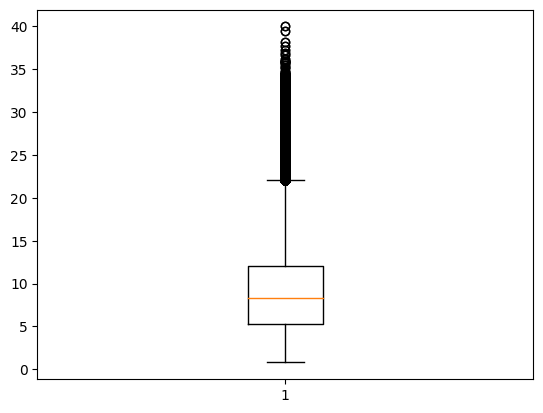

In [220]:
plt.boxplot(data['WindSpeed'])
plt.show()

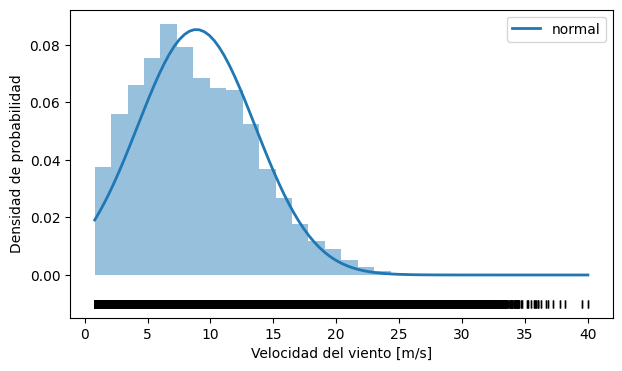

In [247]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['WindSpeed'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(np.min(data['WindSpeed']), np.max(data['WindSpeed']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data['WindSpeed'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['WindSpeed'], np.full_like(data['WindSpeed'], -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Velocidad del viento [m/s]')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

### Dirección del viento [degº]

In [213]:
med_tend_central(data.WindDirection)
med_var(data.WindDirection)

MEDIDAS DE TENCENCIA CENTRAL:
Media = 188.09909147966687
Mediana = 199.6
MEDIDAS DE VARIABILIDAD:
Desviación estándar = 90.48315486419867
Rango intercuatílico = 144.20000000000002


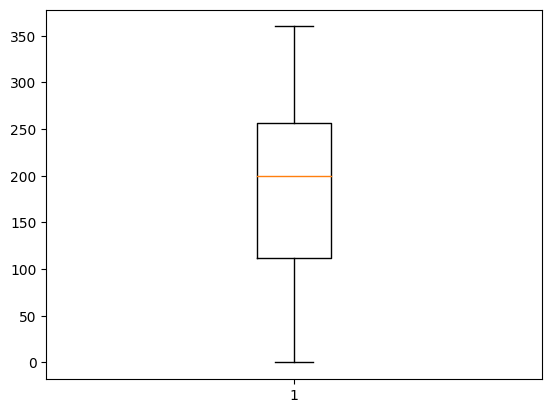

In [219]:
plt.boxplot(data['WindDirection'])
plt.show()

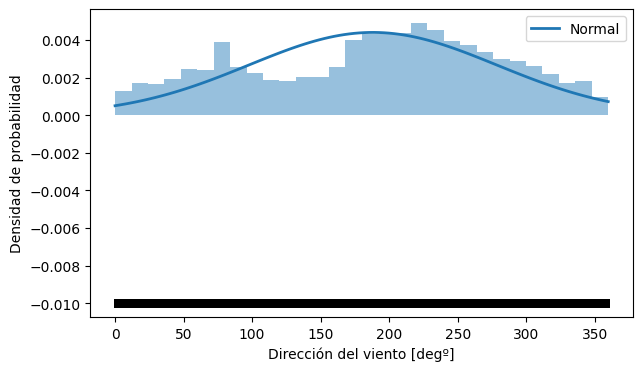

In [246]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['WindDirection'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(np.min(data['WindDirection']), np.max(data['WindDirection']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Normal')
ax.hist(x=data['WindDirection'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['WindDirection'], np.full_like(data['WindDirection'], -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Dirección del viento [degº]')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

### Potencia Reactiva [VAr]

In [221]:
med_tend_central(data.ReactivePower)
med_var(data.ReactivePower)

MEDIDAS DE TENCENCIA CENTRAL:
Media = 0.08450503288492132
Mediana = -0.00372326
MEDIDAS DE VARIABILIDAD:
Desviación estándar = 0.3707868497241132
Rango intercuatílico = 0.208869


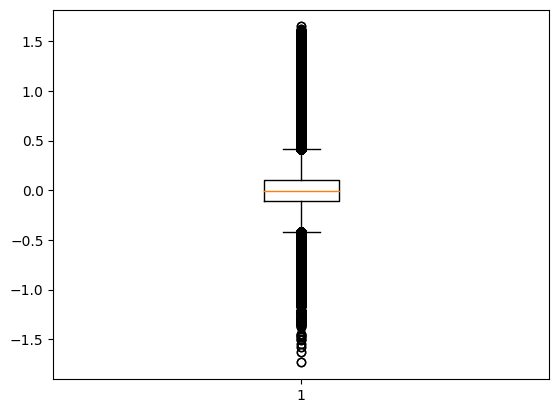

In [222]:
plt.boxplot(data['ReactivePower'])
plt.show()

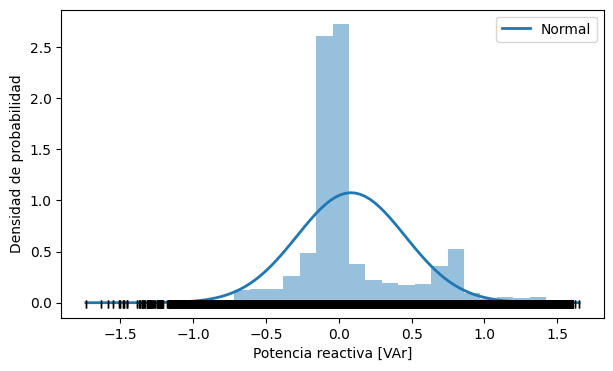

In [245]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['ReactivePower'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(np.min(data['ReactivePower']), np.max(data['ReactivePower']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Normal')
ax.hist(x=data['ReactivePower'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['ReactivePower'], np.full_like(data['ReactivePower'], -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Potencia reactiva [VAr]')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

### Potencia Activa [MW]

In [223]:
med_tend_central(data.ActivePower)
med_var(data.ActivePower)

MEDIDAS DE TENCENCIA CENTRAL:
Media = 2.3618630510236307
Mediana = 1.88173
MEDIDAS DE VARIABILIDAD:
Desviación estándar = 2.0771950222681794
Rango intercuatílico = 4.747679


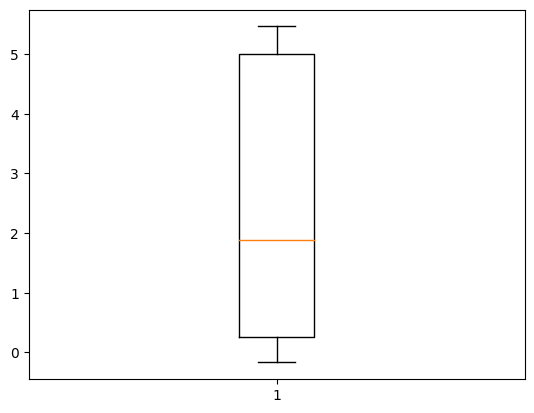

In [224]:
plt.boxplot(data['ActivePower'])
plt.show()

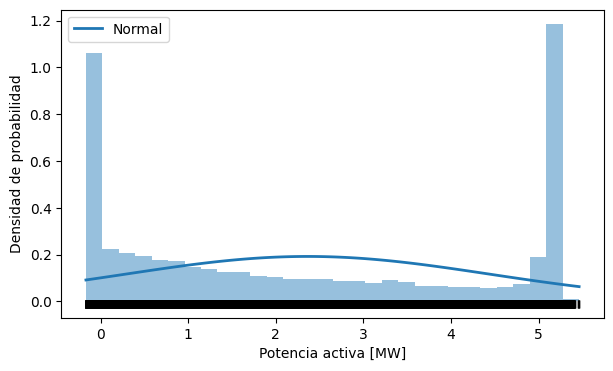

In [244]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['ActivePower'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(np.min(data['ActivePower']), np.max(data['ActivePower']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Normal')
ax.hist(x=data['ActivePower'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['ActivePower'], np.full_like(data['ActivePower'], -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Potencia activa [MW]')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

### Ángulo de fase

In [225]:
med_tend_central(data.PhaseAngle)
med_var(data.PhaseAngle)

MEDIDAS DE TENCENCIA CENTRAL:
Media = -0.6979469562346073
Mediana = -0.99625
MEDIDAS DE VARIABILIDAD:
Desviación estándar = 0.5255682738588273
Rango intercuatílico = 0.34840000000000004


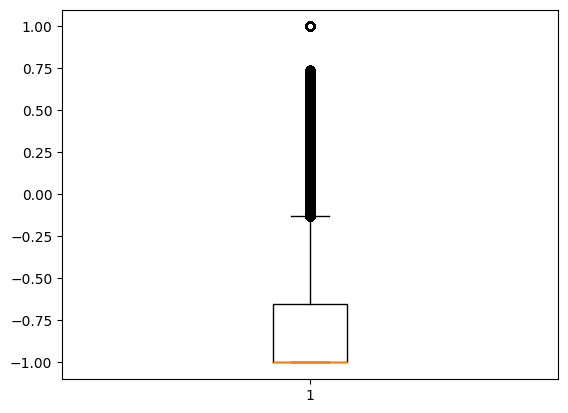

In [226]:
plt.boxplot(data['PhaseAngle'])
plt.show()

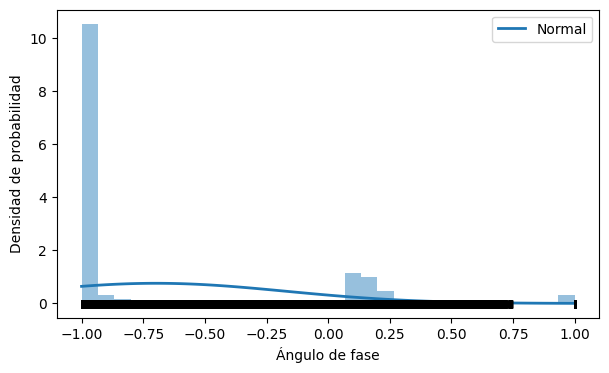

In [243]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['PhaseAngle'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(np.min(data['PhaseAngle']), np.max(data['PhaseAngle']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Normal')
ax.hist(x=data['PhaseAngle'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['PhaseAngle'], np.full_like(data['PhaseAngle'], -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Ángulo de fase')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

## Análisis bivariado

### Velocidad del viento VS Potencia Activa

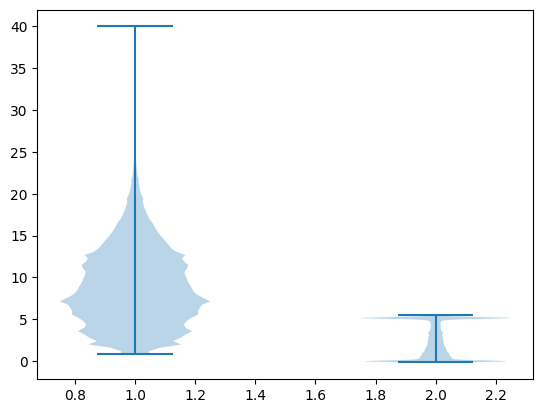

In [233]:
fig, ax = plt.subplots()
ax.violinplot([data.WindSpeed, data.ActivePower])
plt.show()

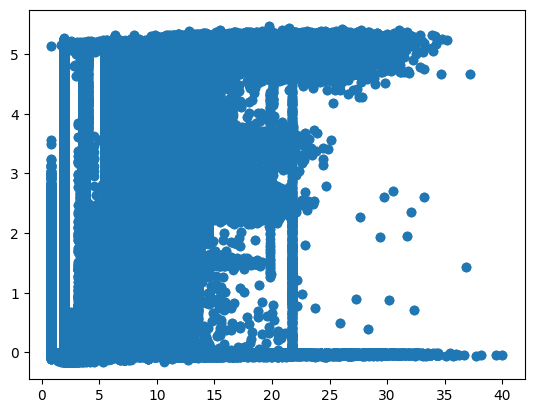

In [234]:
plt.scatter(data.WindSpeed, data.ActivePower)

### Velocidad del viento VS Dirección del viento

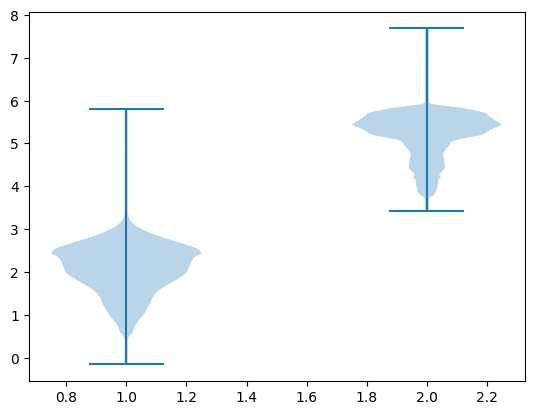

In [128]:
fig, ax = plt.subplots()
ax.violinplot([data.WindSpeed, data.WindDirection])
plt.show()

### Dirección del viento VS Potencia Activa

## Series temporales

In [106]:
data['year'] = data['time'].apply(lambda x: int(x.split(' ')[0].split('-')[0]))

/var/folders/2l/vvs13szs5gxbhbsk5mznxk800000gn/T/ipykernel_48354/681429006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['time'].apply(lambda x: int(x.split(' ')[0].split('-')[0]))


In [108]:
year1 = data[data.year == 2012]
year2 = data[data.year == 2013]
year3 = data[data.year == 2014]
year4 = data[data.year == 2015]
year5 = data[data.year == 2016]
year6 = data[data.year == 2017]

### Velocidad del viento

In [179]:
plt.plot(year1.time, year1.WindSpeed)

Error in callback <function _draw_all_if_interactive at 0x7fdeb953c310> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fdb8fe7f700> (for post_execute):


KeyboardInterrupt: 

### Dirección del viento

### Potencia Activa

## Análisis multivariante